# Import Libraries and Load Data

In [11]:
import tensorflow as tf
import pandas as pf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import numpy as np
import seaborn as sns

In [12]:
data = pf.read_csv('campaign_data.csv')
data.head()

,CampaignID,GoalAmount,RaisedAmount,DurationDays,NumBackers,Category,LaunchMonth,Country,Currency,OwnerExperience,VideoIncluded,SocialMediaPresence,NumUpdates,IsSuccessful
0,CID_00000,76159,73518.028955,15,1903,Film,September,Australia,GBP,11,Yes,41758,3,0
1,CID_00001,69394,60068.683288,49,469,Art,October,Australia,GBP,7,Yes,79112,48,0
2,CID_00002,18652,22958.153470,58,148,Film,February,USA,EUR,17,No,3942,9,1
3,CID_00003,19487,24229.048390,39,780,Film,October,Germany,AUD,10,No,22047,35,1
4,CID_00004,26734,17984.630311,68,1622,Games,September,Australia,AUD,12,Yes,72568,17,0


# Data Preprocessing

In [13]:
# drop the campaign_id column
data = data.drop(['CampaignID'], axis=1)
data.head()

,GoalAmount,RaisedAmount,DurationDays,NumBackers,Category,LaunchMonth,Country,Currency,OwnerExperience,VideoIncluded,SocialMediaPresence,NumUpdates,IsSuccessful
0,76159,73518.028955,15,1903,Film,September,Australia,GBP,11,Yes,41758,3,0
1,69394,60068.683288,49,469,Art,October,Australia,GBP,7,Yes,79112,48,0
2,18652,22958.153470,58,148,Film,February,USA,EUR,17,No,3942,9,1
3,19487,24229.048390,39,780,Film,October,Germany,AUD,10,No,22047,35,1
4,26734,17984.630311,68,1622,Games,September,Australia,AUD,12,Yes,72568,17,0


In [14]:
# check for missing values
for column in data.columns:
    print(f'{column} has {data[column].isnull().sum()} missing values')


GoalAmount has 0 missing values
RaisedAmount has 0 missing values
DurationDays has 0 missing values
NumBackers has 0 missing values
Category has 0 missing values
LaunchMonth has 0 missing values
Country has 0 missing values
Currency has 0 missing values
OwnerExperience has 0 missing values
VideoIncluded has 0 missing values
SocialMediaPresence has 0 missing values
NumUpdates has 0 missing values
IsSuccessful has 0 missing values


In [15]:
# check column data types
for column in data.columns:
    print(f'{column} has {data[column].dtype} data type')

GoalAmount has int64 data type
RaisedAmount has float64 data type
DurationDays has int64 data type
NumBackers has int64 data type
Category has object data type
LaunchMonth has object data type
Country has object data type
Currency has object data type
OwnerExperience has int64 data type
VideoIncluded has object data type
SocialMediaPresence has int64 data type
NumUpdates has int64 data type
IsSuccessful has int64 data type


In [16]:
# convert categorical columns to numerical
label_encoder = LabelEncoder()
data['Category'] = label_encoder.fit_transform(data['Category'])
data['LaunchMonth'] = label_encoder.fit_transform(data['LaunchMonth'])
data['Country'] = label_encoder.fit_transform(data['Country'])
data['Currency'] = label_encoder.fit_transform(data['Currency'])
data['VideoIncluded'] = label_encoder.fit_transform(data['VideoIncluded'])

data.head()



,GoalAmount,RaisedAmount,DurationDays,NumBackers,Category,LaunchMonth,Country,Currency,OwnerExperience,VideoIncluded,SocialMediaPresence,NumUpdates,IsSuccessful
0,76159,73518.028955,15,1903,1,11,0,3,11,1,41758,3,0
1,69394,60068.683288,49,469,0,10,0,3,7,1,79112,48,0
2,18652,22958.153470,58,148,1,3,4,2,17,0,3942,9,1
3,19487,24229.048390,39,780,1,10,2,0,10,0,22047,35,1
4,26734,17984.630311,68,1622,2,11,0,0,12,1,72568,17,0


In [18]:
# feature selection
X = data.drop(['IsSuccessful'], axis=1)
y = data['IsSuccessful']


In [20]:
# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build Model

In [21]:
# build the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                416       
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1,505
Trainable params: 1,505
Non-trainable params: 0
_________________________________________________________________


# Train Model

In [22]:
early_stopping = tf.keras.callbacks.EarlyStopping(patience=2)

history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

Epoch 1/100
2000/2000 [==============================] - 13s 5ms/step - loss: 24.2055 - accuracy: 0.9563 - val_loss: 4.5619 - val_accuracy: 0.9663
Epoch 2/100
2000/2000 [==============================] - 4s 2ms/step - loss: 5.7370 - accuracy: 0.9725 - val_loss: 9.6727 - val_accuracy: 0.9625
Epoch 3/100
2000/2000 [==============================] - 4s 2ms/step - loss: 5.0824 - accuracy: 0.9778 - val_loss: 1.1558 - val_accuracy: 0.9888
Epoch 4/100
2000/2000 [==============================] - 4s 2ms/step - loss: 4.7082 - accuracy: 0.9802 - val_loss: 2.6780 - val_accuracy: 0.9839
Epoch 5/100
2000/2000 [==============================] - 4s 2ms/step - loss: 3.8082 - accuracy: 0.9803 - val_loss: 1.0694 - val_accuracy: 0.9899
Epoch 6/100
2000/2000 [==============================] - 4s 2ms/step - loss: 2.5869 - accuracy: 0.9843 - val_loss: 2.0127 - val_accuracy: 0.9825
Epoch 7/100
2000/2000 [==============================] - 4s 2ms/step - loss: 2.3562 - accuracy: 0.9846 - val_loss: 2.5375 - val_

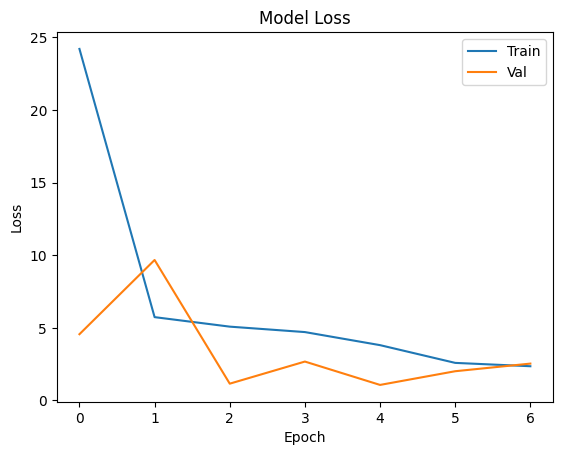

In [23]:
# plot the training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

# Predict with Test Data

In [28]:
# predict on the test set
y_pred = model.predict(X_test)
y_pred = np.round(y_pred)

# evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Model Loss: {loss}')
print(f'Model Accuracy: {accuracy * 100:.2f}%')


625/625 [==============================] - 1s 1ms/step - loss: 2.9828 - accuracy: 0.9765
Model Loss: 2.9827828407287598
Model Accuracy: 97.65%


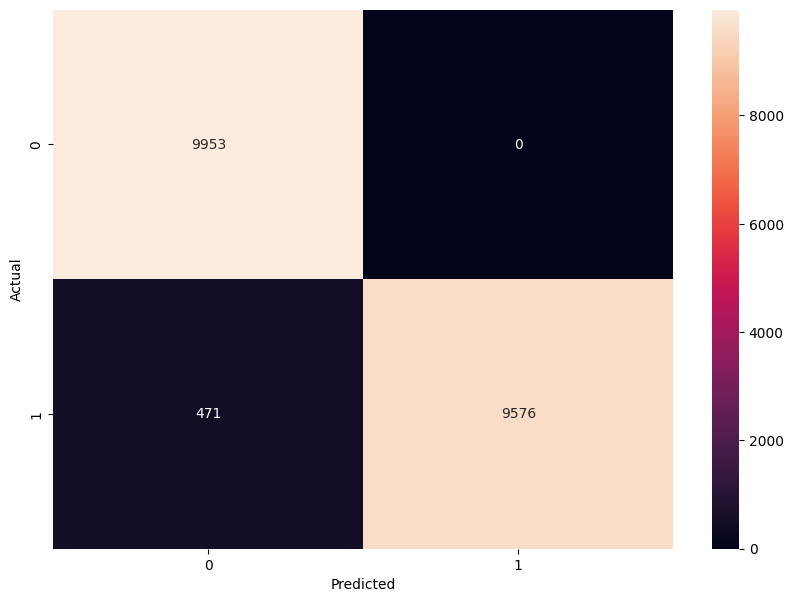

In [31]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
